Train no teaching

In [1]:
!python3 -m scripts.train --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model test_no_teach

Memory  1
/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model test_no_teach

Namespace(algo='ppo', argmax=False, batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-TeacherDoorKey-5x5-v0', episodes=10, epochs=4, frames=80000, frames_per_proc=None, gae_lambda=0.95, historical_averaging=False, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='test_no_teach', optim_alpha=0.99, optim_eps=1e-08, procs=8, recurrence=1, save_interval=10, seed=1, t_iter=5, teach=False, text=False, value_loss_coef=0.5, worst_episodes_to_show=10)

Device: {device}

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

Train with teaching

In [2]:
!python3 -m scripts.train --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model test_teach --teach

Memory  1
/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model test_teach --teach

Namespace(algo='ppo', argmax=False, batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-TeacherDoorKey-5x5-v0', episodes=10, epochs=4, frames=80000, frames_per_proc=None, gae_lambda=0.95, historical_averaging=False, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='test_teach', optim_alpha=0.99, optim_eps=1e-08, procs=8, recurrence=1, save_interval=10, seed=1, t_iter=5, teach=True, text=False, value_loss_coef=0.5, worst_episodes_to_show=10)

Device: {device}

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilati

Plot the learning curves. Learning happens quicker with teaching

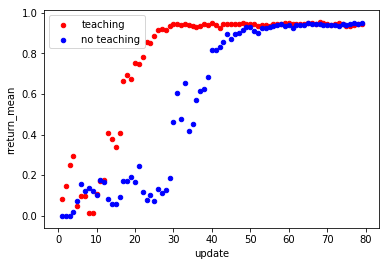

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

teach_file_name = '/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/storage/test_teach/log.csv'
noteach_file_name = '/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/storage/test_no_teach/log.csv'

data_teach = pd.read_csv(teach_file_name)
data_noteach = pd.read_csv(noteach_file_name)

ax = plt.gca()
data_teach.plot(kind='scatter',x='update',y='rreturn_mean',color='red',ax=ax, label='teaching')
data_noteach.plot(kind='scatter',x='update',y='rreturn_mean',color='blue',ax=ax, label='no teaching')
plt.legend()
plt.show()

Try historical averaging

In [13]:
!python3 -m scripts.train --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model hist_avg --teach --historical_averaging

Memory  1
/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-TeacherDoorKey-5x5-v0 --save-interval 10 --frames 80000 --procs 8 --model hist_avg --teach --historical_averaging

Namespace(algo='ppo', argmax=False, batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-TeacherDoorKey-5x5-v0', episodes=10, epochs=4, frames=80000, frames_per_proc=None, gae_lambda=0.95, historical_averaging=True, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=False, model='hist_avg', optim_alpha=0.99, optim_eps=1e-08, procs=8, recurrence=1, save_interval=10, seed=1, t_iter=5, teach=True, text=False, value_loss_coef=0.5, worst_episodes_to_show=10)

Device: {device}

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2),

Plot learning curves

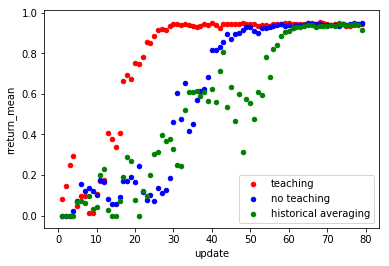

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

teach_file_name = '/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/storage/test_teach/log.csv'
noteach_file_name = '/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/storage/test_no_teach/log.csv'
havg_file_name = '/Users/logancross/Documents/DeepRL/AsymmPlay/project/torch/rl-starter-files/storage/hist_avg/log.csv'

data_teach = pd.read_csv(teach_file_name)
data_noteach = pd.read_csv(noteach_file_name)
data_havg = pd.read_csv(havg_file_name)

ax = plt.gca()
data_teach.plot(kind='scatter',x='update',y='rreturn_mean',color='red',ax=ax, label='teaching')
data_noteach.plot(kind='scatter',x='update',y='rreturn_mean',color='blue',ax=ax, label='no teaching')
data_havg.plot(kind='scatter',x='update',y='rreturn_mean',color='green',ax=ax, label='historical averaging')
plt.legend()
plt.show()